In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
data_df = pd.read_csv('/Users/tinglu/Desktop/stack-overflow-survey/final_data.csv')
data_df.head()

,Age,EdLevel,YearsCodePro,DevType,CompanySize,Salary_USD
0,18-35 years old,Master,2,DS/MLE,Small(1-99),42480.0
1,18-35 years old,Bachelor,5,DS/MLE,Large(>1000),130000.0
2,18-35 years old,Master,2,DE/DA/BA,Large(>1000),28320.0
3,>35 years old,Doctoral(PhD),8,DS/MLE,Medium(100-999),158000.0
4,18-35 years old,Doctoral(PhD),1,DS/MLE,Small(1-99),100000.0


In [7]:
data_df['EdLevel'].value_counts()

Master           3260
Bachelor         3187
Doctoral(PhD)     771
Name: EdLevel, dtype: int64

In [8]:
data_df['DevType'].value_counts()

DE/DA/BA    3908
DS/MLE      3310
Name: DevType, dtype: int64

### The proportion of Education Level of different Job Types by Age groups

In [9]:
cross_tab = pd.crosstab(index=[data_df['DevType'], data_df['Age']], columns=data_df['EdLevel'], normalize='index').round(2)
cross_tab

EdLevel                   Bachelor  Doctoral(PhD)  Master
DevType  Age                                             
DE/DA/BA 18-35 years old      0.62           0.02    0.37
         >35 years old        0.49           0.07    0.43
DS/MLE   18-35 years old      0.33           0.12    0.55
         >35 years old        0.23           0.32    0.46

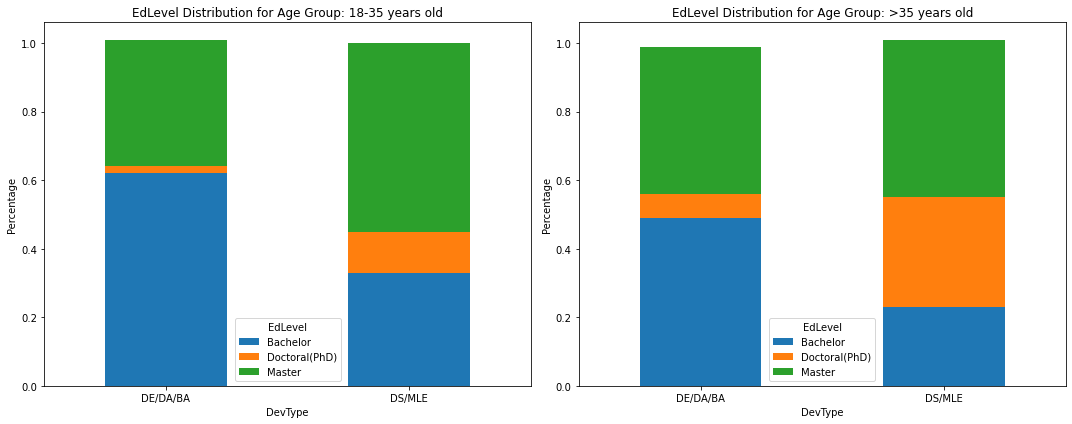

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate the crosstab
cross_tab = pd.crosstab(index=[data_df['DevType'], data_df['Age']], columns=data_df['EdLevel'], normalize='index').round(2)

# Get unique age groups
unique_age_groups = data_df['Age'].unique()

# Plot each age group in separate subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, age_group in enumerate(unique_age_groups):
    age_group_cross_tab = cross_tab.xs(age_group, level=1)  # Get cross-tab for specific age group
    age_group_cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
    
    axes[i].set_xlabel('DevType')
    axes[i].set_ylabel('Percentage')
    axes[i].set_title(f'EdLevel Distribution for Age Group: {age_group}')
    axes[i].legend(title='EdLevel')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()
